## Topic Model Letter Chunk Prep

## Resources

In [1]:
# Packages
import pandas as pd
import gensim
import numpy as np
from gensim.utils import simple_preprocess
import spacy
import pickle
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
# Functions for stopwords, bigrams, trigrams, lemmatization, conversion of texts into list of lowercase tokens

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def text_to_words(texts):
    for text in texts:
        yield(gensim.utils.simple_preprocess(str(text), 
                                             deacc=True, # removes accents
                                             min_len=3))   # removes tokens shorter than three characters

In [3]:
# Initialize spacy 'en' model
# python3 -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

In [4]:
# 19th century stopwords
stop_words = pd.read_csv("Jockers_19thCenturyStops.csv")
stop_words = stop_words['word'].values.astype(str).tolist()
len(stop_words)

5631

In [5]:
# Narratives
df = pd.read_csv("20240608_PhD_Data4TopicModel-LetterChunk.csv") 
df = df.rename(columns={'Unnamed: 0':'docID-AT'}) # Change column name to "docID-AT"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   docID-AT          2392 non-null   int64  
 1   docid             2392 non-null   object 
 2   docyear           2392 non-null   int64  
 3   docmonth          2364 non-null   float64
 4   authorName        2177 non-null   object 
 5   docauthorid       2392 non-null   object 
 6   authorLocation    2392 non-null   object 
 7   authorGender      2392 non-null   object 
 8   nationalOrigin    2392 non-null   object 
 9   irish             2392 non-null   bool   
 10  otherUK           2392 non-null   bool   
 11  relMin            1065 non-null   object 
 12  catholic          1065 non-null   object 
 13  otherChristian    1065 non-null   object 
 14  U                 1253 non-null   object 
 15  M                 1276 non-null   object 
 16  S                 1245 non-null   object 


Code below adapated from https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920

## Prepare narratives

In [6]:
# Convert values in text to list of strings (objects)
data = df.text.values.tolist()

In [7]:
data_words = list(text_to_words(data))

In [8]:
#data_words[0]

## Bigram (and trigram) models

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=34)
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
# See results of trigrams function

#trigrams1 = [] # Create list
#for item in data_words: # For each item (i.e., chunk) in data words
    #trigrams1.append([b for b in trigram[item] if b.count('_') == 1]) # add 2-grams to new list
#trigrams1 = list(np.concatenate(trigrams1)) # flatten list
#trigrams1 = list(dict.fromkeys(trigrams1)) # take unique values
#print(sorted(trigrams1)) # print in alphabetical order

#trigrams2 = [] # Create list
#for item in data_words: # For each item (i.e., chunk) in data words
    #trigrams2.append([b for b in trigram[item] if b.count('_') == 2]) # add 2-grams to new list
#trigrams2 = list(np.concatenate(trigrams2)) # flatten list
#trigrams2 = list(dict.fromkeys(trigrams2)) # take unique values
#print(sorted(trigrams2)) # print in alphabetical order

## Stop Words

In [11]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [12]:
# What are the most common words?
counts = Counter(x for sublist in data_words_nostops for x in sublist)
Counter(counts).most_common(1000)

[('dear', 2028),
 ('time', 1420),
 ('little', 1272),
 ('letter', 1211),
 ('day', 1046),
 ('country', 1014),
 ('write', 839),
 ('old', 788),
 ('give', 712),
 ('hear', 707),
 ('place', 647),
 ('send', 644),
 ('work', 638),
 ('kind', 616),
 ('house', 615),
 ('take', 601),
 ('years', 586),
 ('land', 580),
 ('came', 573),
 ('children', 572),
 ('week', 569),
 ('wish', 562),
 ('quite', 555),
 ('days', 525),
 ('poor', 516),
 ('family', 514),
 ('people', 511),
 ('year', 508),
 ('mother', 503),
 ('going', 494),
 ('feel', 483),
 ('friends', 460),
 ('father', 458),
 ('critchlow', 456),
 ('health', 452),
 ('brother', 451),
 ('find', 435),
 ('money', 426),
 ('present', 423),
 ('sent', 417),
 ('pounds', 416),
 ('god', 414),
 ('sister', 401),
 ('dollars', 392),
 ('life', 383),
 ('letters', 371),
 ('fine', 370),
 ('able', 368),
 ('canada', 366),
 ('saw', 366),
 ('heard', 361),
 ('glad', 359),
 ('friend', 359),
 ('received', 357),
 ('night', 354),
 ('wrote', 344),
 ('seen', 342),
 ('happy', 333),
 ('hav

In [13]:
len(Counter(counts))

15681

In [14]:
new_items = ['critchlow', 
             'moodie', 
             'albuquerque', 
             'ellin', 
             'belleville', 
             'toronto', 
             'montreal', 
             'bentley', 
             'york', 
             'london', 
             'quebec',
             'hamilton', 
             'carrothers', 
             'blandina', 
             'cincinnati', 
             'california', 
             'gasparri', 
             'washington',
             'canada',
             'states', # in this corpus, refers to United States (leaving singular)
             'england',
             'ireland',
             'mexico',
             'scotland',
             'january',
             'february',
             'march',
             'april',
             'may',
             'june',
             'july',
             'august',
             'september',
             'october',
             'november',
             'december',
             'boston',
             'europe',
             #'monday',
             #'tuesday',
             #'wednesday',
             #'thursday',
             #'friday',
             #'saturday',
             #'sunday',
             'dear', # In this corpus, dear, regard, regards are conventional opening and closing language'regard',
             'regards',
             #'mother', # not including plural forms so the base forms of the items below 
             #'father', # still exist in the final texts
             #'brother',
             #'sister',
             #'uncle',
             #'aunt',
             #'son',
             #'daughter',
             #'friend',
             #'sir'
             #'letter', # allowing the plural form to capture to correspondence more generally
             #'time', # high frequency
             #'times',
             #'day', # high frequency
             #'days',
             #'week',
             #'weeks',
             #'month',
             #'months',
             #'year',
             #'years',
             'parr',
             'traill',
             'ellin',
             'cumming',
             'philadelphia',
             'petersburg',
             'peterboro',
             'ohio',
             'orlebar',
             'haszard', 
             'united', # in this corpus, frequently refers to united states
             'davies',
             'lamy',
             'forsyth',
             'chavez',
             'vickers',
             'liverpool', 
             'albany',
             'weir',
             'baltimore',
             'dunbar',
             'campbell',
             'thorndike',
             'birmingham',
             'ontario',
             'columbia'
            ]

stop_words.extend(new_items)
len(stop_words)

5697

I noticed that winter was dropped as a stopword. Checking the Jockers list, I see that the other seasons are there too. I want to leave seasons as they are potentially associated with key topics. Also, removing here, there and home. Checked the whole list and added quite a few words that seem inappropriate as stopwords for this study.

In [15]:
x = ['winter', 
     'spring', 
     'summer', 
     'autumn',  
     'home', 
     'fairy', 
     'faith', 
     'forest', 
     'brook', 
     'gala', 
     'gay', 
     'hunter', 
     'ivy',
     'jewel',
     #'love', keeping out love because of it being a sign-off convention
     'maple',
     'pages',
     'page',
     'research',
     'son',
     'star',
     'stormy',
     'sun',
     'sunny',
     'sunshine',
     'temple',
     'together',
     'velvet',
     'blossom']
stop_words = [s for s in stop_words if s not in x]
len(stop_words)

5669

In [16]:
# Put in alphabetical order
stop_words.sort() 

In [17]:
# Re-remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# What are the most common words?
counts = Counter(x for sublist in data_words_nostops for x in sublist)
Counter(counts).most_common(1000)

[('time', 1420),
 ('little', 1272),
 ('letter', 1211),
 ('day', 1046),
 ('country', 1014),
 ('home', 940),
 ('write', 839),
 ('old', 788),
 ('give', 712),
 ('hear', 707),
 ('place', 647),
 ('send', 644),
 ('work', 638),
 ('kind', 616),
 ('house', 615),
 ('take', 601),
 ('years', 586),
 ('land', 580),
 ('came', 573),
 ('children', 572),
 ('week', 569),
 ('wish', 562),
 ('quite', 555),
 ('days', 525),
 ('poor', 516),
 ('family', 514),
 ('people', 511),
 ('year', 508),
 ('mother', 503),
 ('going', 494),
 ('feel', 483),
 ('friends', 460),
 ('father', 458),
 ('health', 452),
 ('brother', 451),
 ('winter', 447),
 ('find', 435),
 ('money', 426),
 ('present', 423),
 ('sent', 417),
 ('pounds', 416),
 ('god', 414),
 ('sister', 401),
 ('dollars', 392),
 ('life', 383),
 ('summer', 373),
 ('letters', 371),
 ('fine', 370),
 ('able', 368),
 ('saw', 366),
 ('heard', 361),
 ('glad', 359),
 ('friend', 359),
 ('received', 357),
 ('night', 354),
 ('wrote', 344),
 ('seen', 342),
 ('happy', 333),
 ('having'

In [18]:
len(Counter(counts))

15654

## Bigrams & Lemmatization

In [19]:
# See results of bigrams function
bigrams = [] # Create list
for item in data_words_nostops: # For each item (i.e., letter) in data words
    bigrams.append([b for b in bigram[item] if b.count('_') == 1]) # add 2-grams to new list
bigrams = list(np.concatenate(bigrams)) # flatten list
bigrams = list(dict.fromkeys(bigrams)) # take unique values
print(sorted(bigrams)) # print in alphabetical order

['days_ago', 'glad_hear', 'god_bless', 'indian_corn', 'short_time', 'sorry_hear', 'thank_god', 'welcome_letter', 'years_ago']


The bigrams function was overactive at min=5, threshold=100. I tweeked this and settled on min=34 (to bring into the most frequent word list) and no threshold setting (so that it would default to 10). 

In [20]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Form Trigrams
# data_words_trigrams = make_trigrams(data_words_nostops)

In [21]:
# Do lemmatization keeping only nouns
data_lemmatizedNouns = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#print(data_lemmatizedNouns[:1])

In [22]:
counts = Counter(x for sublist in data_lemmatizedNouns for x in sublist)
len(Counter(counts))

6541

In [23]:
# Do lemmatization keeping only verbs
#data_lemmatizedVerbs = lemmatization(data_words_bigrams, allowed_postags=['VERB'])
#print(data_lemmatizedVerbs[:1])

In [24]:
#counts = Counter(x for sublist in data_lemmatizedVerbs for x in sublist)
#len(Counter(counts))

In [25]:
# Do lemmatization keeping only noun, verb
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])
#print(data_lemmatized[:1])

In [27]:
counts = Counter(x for sublist in data_lemmatized for x in sublist)
len(Counter(counts))

7870

## Evaluation

In [28]:
lengths = []

for x in data_lemmatized:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

98
14
55.07107023411371


In [29]:
# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

328

In [30]:
print(df['text'][328])

afraid I will not get there I am 63 years old but I dont feel very old. Our adress address is 308 Meadow Ave Avenue Crawfordsville Indiana I hope you will write to me we would be so glad to have some of you come out hear here to see us or anay any of Hughs folk we would be glad to see you all. My husband Walter Hisson died about 8 years ago. 5 I remain your cousin Eliza S Hisson I see I hasent have not writen written on both sides of my paper but may be you can make it out.


In [31]:
print(data_words_nostops[328])

['afraid', 'years', 'old', 'feel', 'old', 'adress', 'address', 'meadow', 'ave', 'avenue', 'crawfordsville', 'indiana', 'write', 'glad', 'hear', 'anay', 'hughs', 'folk', 'glad', 'husband', 'hisson', 'died', 'years', 'ago', 'remain', 'cousin', 'hisson', 'hasent', 'writen', 'written', 'sides', 'paper']


In [32]:
print(data_words_bigrams[328])

['afraid', 'years', 'old', 'feel', 'old', 'adress', 'address', 'meadow', 'ave', 'avenue', 'crawfordsville', 'indiana', 'write', 'glad_hear', 'anay', 'hughs', 'folk', 'glad', 'husband', 'hisson', 'died', 'years_ago', 'remain', 'cousin', 'hisson', 'hasent', 'writen', 'written', 'sides', 'paper']


In [33]:
print(data_lemmatized[328])

['year', 'feel', 'adress', 'address', 'write', 'hugh', 'folk', 'husband', 'die', 'remain', 'writen', 'write', 'side', 'paper']


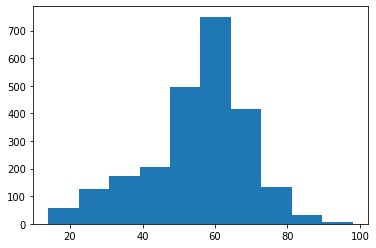

In [34]:
plt.hist(lengths, 10)
plt.show()

In [35]:
lengths = []

for x in data_lemmatizedNouns:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

76
5
36.29891304347826


In [37]:
# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

59

In [38]:
print(df['text'][59])

you. Mr Truman comes to B-ham Birmingham next Tuesday to move Mrs T'S remains to B-ham cemetary cemetery. I don't know whether Mina is coming or not. Did you see them when they were down before ? Has your sister come back yet or do you hear from her. I don't know as you can read half of this but please answer what you can read and I will do better in the future Edith If I can get one of the programmes of our meetings before I send this I will send it to you so you can ask what we are doing or trying to do yours with love Edith.


In [39]:
print(data_lemmatizedNouns[59])

['move', 'cemetery', 'sister', 'programme', 'meeting']


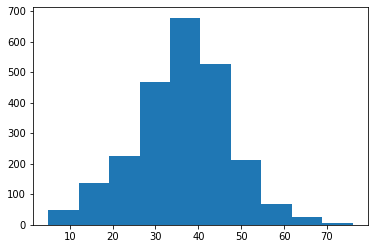

In [40]:
plt.hist(lengths, 10)
plt.show()

The mean length of the chunk is above 50 for the noun-verb set but below 50 for the noun-only set. This might mean that the noun-only modeling for the segments may not work well. Might have to use the noun-verb set.

## Saving work

In [42]:
with open("20240608_PhD_LtrChkLem-N.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatizedNouns, fp)

#with open("20240608_PhD_LtrChkLem-V.txt", "wb") as fp:   #Pickling
    #pickle.dump(data_lemmatizedVerbs, fp)

with open("20240608_PhD_LtrChkLem-NV.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatized, fp)